https://www.explainxkcd.com/wiki/images/f/fd/python.png

# Beam Model

## Kinematics

Consider a beam of length L  with a straigth reference configuration and denote by $s$ the arc-length in this configuration. Without loss of generality, let us use a Cartesian reference system $(O,\underline{e}_1,\underline{e}_2)$ with the origin at the left end of the beam and $\underline{e}_1$ oriented as the beam in the reference configuration. Hence the reference configuration can be wirtten with the following parametric representation

$$
\underline x_R(s) = s \,\underline{e_1} 
$$

The current cunfiguration is given by 

$$
\underline x(s) =  (s+u(s)) \underline{e}_1 + v(s) \underline{e}_2
$$

where $\underline u(s)= u(s) \underline{e}_1 + v(s) \underline{e}_2$ is the displacement vector, with the axial ($u$) and transversal ($v$) components, in the reference configuration.

We can use two `python` packages, `numpy` and `matplotlib` to represent the beam.

First let us define the reference configuration as two functions:

In [7]:
import numpy as np
def xR(s):
    return s
def yR(s):
    return 0.*s
s = np.linspace(0.,1.,20) 
xR(s)

array([ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ])

We can represent it using `matplotlib`

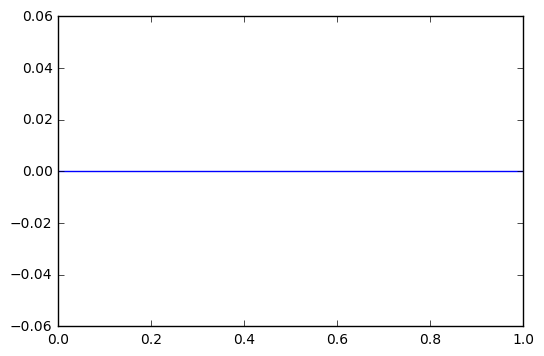

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(xR(s),yR(s))

Then we can do it better with the current configuration

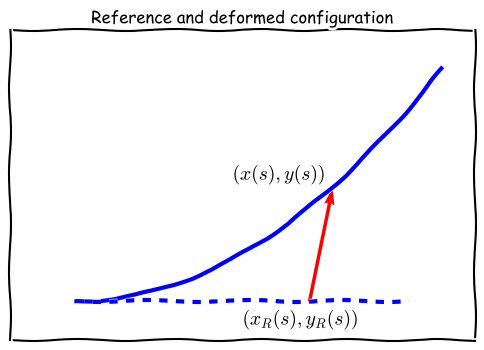

In [9]:
x = lambda s : xR(s) + .1*s
y = lambda s : yR(s) + .3*s**2

with plt.xkcd():
    fig, ax = plt.subplots()
    ax.plot(x(s),y(s),"r",color='b', ls='-', lw=3)
    ax.plot(xR(s),yR(s),"r",color='b', ls='--', lw=3)
    ax.quiver(xR(.7),yR(.7),x(.7)-xR(.7),y(.7)-yR(.7),color='r',scale_units='xy', angles='xy', scale=1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reference and deformed configuration")
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.05, .35)
    ax.text(xR(.7)-.2,yR(.7)-.03,r'$({x}_R(s),y_R(s))$')
    ax.text(x(.7)-.3,y(.7)+.01,r'$({x}(s),y(s))$')



The unit tangent vector to the current configuration is given by

\begin{equation}
\underline{t}(s) = \dfrac{\underline{x}'(s)}{\Vert{\underline{x}'(s)}\Vert} = \cos\theta(s)\,\underline{e}_1 + \sin\theta(s) \,\underline{e}_2
\end{equation}

where in the last equality we introduced the angle $\theta(s)$ between the tangent $\underline{t}(s)$ and $\underline{e}_1$.

We define the following **deformations measures** for the beam:

\begin{equation}
\begin{cases}
\epsilon(s) = \Vert{\underline{x}'(s)}\Vert - 1 = \sqrt{(1+u'(s))^2+v'(s)^2}-1&(extension)\\
\kappa(s) = \theta'(s) & (curvature)
\end{cases}
\end{equation}

When $\epsilon(s)=0$ the beam is *inextensible* and $s$ is an arc-length also in the current configuration. Otherwise the arclength in the current configuration is given by $\tilde s$, such that $\mathrm d \tilde s ^2= \mathrm d x^2+ \mathrm d y^2 = \Vert{\underline{x}'(s)}\Vert^2 ds^2 $. 

The definions of the extension and the tangent give the following expressions for the  derivatives of the displacement field:

$$
\begin{cases}
u'(s)&=(1+\epsilon(s))\cos\theta(s) - 1\\
v'(s)&=(1+\epsilon(s))\sin\theta(s)
\end{cases}
$$

### Moderation rotations, small extension approximation

Let us assume that $\theta$ and $e$ are small. 
Then by a Taylor expansion

$$
\begin{cases}
u'(s)&=(1+\epsilon(s))\cos\theta(s) - 1\simeq \epsilon(s)-\dfrac{\theta(s)^2}{2}\\
v'(s)&=(1+\epsilon(s))\sin\theta(s) \simeq \theta(s)+o(\theta^2)
\end{cases}
$$

### Linearized kinematics


Retaning only the linear terms in the Taylor expansion above one get the fully linearized kinematics for a planar Euler-Bernoulli beam:

$$
\begin{cases}
\epsilon(s) = u'(s)\\
\theta(s) = v'(s)\quad\Rightarrow\quad \kappa(s)=v''(s)
\end{cases}
$$


## Variational Formulation - linearized model

We present below the linear model, assuming the fully linearized kinematics above. This model is valid for small loadings. Let us consider the case of a beam of length $L$, bending stiffness $EI$ and axial stiffness $ES$, which submitted to a distributed force per unit length $\underline f(s)= f_u(s)\underline e_1 +  f_v(s)\underline e_2$.
 


### Elastic energy

Let us consider the case of beam of length $L$, bending stiffness $EI$ and axial stiffness $ES$

We assume a linear constitutive model and that the strain energy density (per unit line) is quadratic in the deformation

$$
W(e,k) = \dfrac{EI}{2} \kappa^2 + \dfrac{ES}{2} \epsilon^2
$$

Hence the total elastic energy of the beam is given by the following functional 

$$
\mathcal{E}(u,v)=\int_0^L\dfrac{EI}{2} v''(s)^2 + \dfrac{ES}{2} u'(s)^2\,ds
$$

### Potential energy for conservative loading

In the case of conservative loadings, the potential energy, say $\mathcal{P}(u,v)$, is the difference between the elastic energy and the work of the external forces, say $\mathcal{F}(u,v)$. 

$$
\mathcal{P}(u,v) = \mathcal{E}(u,v) - \mathcal{F}(u,v)
$$

Let us consider the case in which the end of the beam are clamped and the external forces are in the form of distributed forces per unit length $\underline f(s)= f_u(s)\underline e_1 +  f_v(s)\underline e_2 $. Hence the work of external forces is 

$$
\mathcal{F}(u,v) = \int_0^L f_u(s) \,u(s)+f_v(s) \,v(s)\,ds
$$

If concentrated forces and/or moments are present, their work contribution should be added to the functional above.

### Variational formulation

Using the principle of the minimum of the potential energy, the equilibrium configurations are found looking for the stationarity point of the energy functional $\mathcal{P}(u,v)$ among all admissible displacement field respecting the boundary conditions.

In a first step, we will suppose that displacements and rotations are imposed at both ends, with

$$
\begin{cases}
u(0)= u_0, \, v(0)=v_0, \, v'(0)=\theta_0,\\
u(L)= u_L, \, v(0)=v_L, \, v'(0)=\theta_L
\end{cases}
$$

Instead of solving this problem exactly (see the notes of 3A103), we adopt an approximate method, based on the discretisation using a Galerking approximation




# Discretization

## Galerkin approximation

### Displacement

We look for approximate solutions in the form of linear polynomials for the axial displacement and cubic polynomial for the transverse displacement:

$$
\begin{cases}
u(s) = c_0 +c_1 s\\
v(s) = c_2 + c_3 s + c_4 s^2+ c_5 s^3
\end{cases}
$$

They can be defined in python using `sympy`. We declare the variable $s$ and the coefficients $c_i$'s as `sympy`
 symbols.

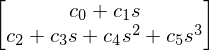

In [10]:
# I use sympy http://docs.sympy.org/
import sympy as sp
from sympy.interactive import printing
printing.init_printing()
s = sp.Symbol('s')
c0, c1, c2, c3, c4, c5 = sp.symbols('c0, c1, c2, c3, c4, c5')
u = c0 + c1*s
v = c2 + c3*s + c4*s**2 + c5*s**3
sp.Matrix([u, v])

We denote by $q(s)=v'(s)$ the rotation field. To calculate it we can use the symbolic differentiation in sympy

In [11]:
q = v.diff(s)
q

Let us now define the vector collecting the displacement and rotation at left and right ends of the beam

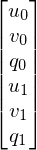

In [12]:
u0, v0, q0, u1, v1, q1 = sp.symbols('u0, v0, q0, u1, v1, q1')
U = sp.Matrix([u0, v0, q0, u1, v1, q1])
U

The polynomial approximation allows us to express the displacement in any point as function of the end displacement $U$. To do it we have to resolve a linear system. We do it by using the capability of `sympy`. 

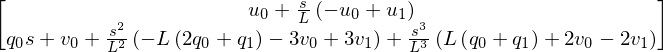

In [13]:
L = sp.Symbol('L')
solu = sp.solve([u.subs({s:0})-u0, u.subs({s:L})-u1], (c0,c1))
solv = sp.solve([v.subs({s:0})-v0, q.subs({s:0})-q0, v.subs({s:L})-v1, q.subs({s:L})-q1], (c2,c3,c4,c5))
u = u.subs(solu)
v = v.subs(solv)
sp.Matrix([u, v])

We can then define the following shape functions $S_{ij}$ that gives the displacement field in the beam as a function of the displacement and rotations at the ends:
$$
\begin{bmatrix}
u(s)\\
v(s)
\end{bmatrix}
= 
S(s)U
$$
We can calculate the matrix S by using the derivative to extract the coefficients with respect to the components of $U$

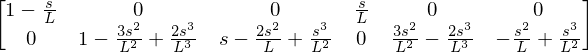

In [14]:
S = sp.Matrix([[u.diff(Ui) for Ui in U],[v.diff(Ui) for Ui in U]])
S

We used above what is called a `python` *list comprehension*, which is a syntax to write table, for example

In [16]:
[i**2 for i in [3,4,5]]

We can represent the basis functions using `matplotlib`

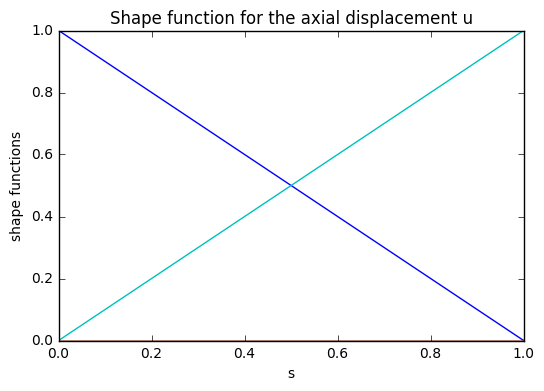

In [34]:
# discretisation of the s variable
sn = np.linspace(0.,1.,100)
# basis functions for u
Sn = np.array([S[0,:].subs({s:si, L:1}) for si in sn])
plt.plot(sn,Sn)
plt.xlabel('s')
plt.ylabel('shape functions')
plt.title('Shape function for the axial displacement u')

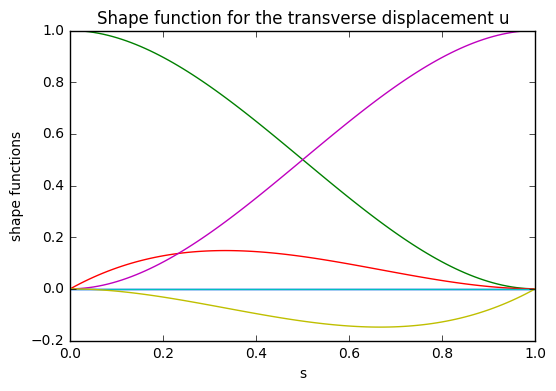

In [35]:
# basis functions for v
Sn = np.array([S[1,:].subs({s:si, L:1}) for si in sn])
plt.plot(sn,Sn)
plt.xlabel('s')
plt.ylabel('shape functions')
plt.title('Shape function for the transverse displacement u')

### Deformations
Within the polynomial approximation above, the deformations are given by

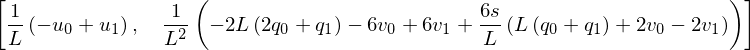

In [36]:
eps = u.diff(s)
kappa = v.diff(s,2)
[eps,kappa]

We can define the following matrix giving the deformation in each point as a function of the displacements and rotations at the ends:
$$
\begin{bmatrix}
e(s)\\
k(s)
\end{bmatrix}
=
B(s) 
U
$$
where

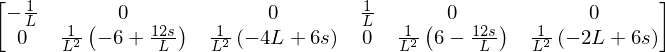

In [37]:
B = sp.Matrix([[eps.diff(Ui) for Ui in U],[kappa.diff(Ui) for Ui in U]])
B

### Elastic energy and stiffness matrix
We can write the extensional energy as
$$
\mathcal E_{\mathrm{ext}} =\int_0^L\dfrac{ES}{2} e(s)^2\,ds = \dfrac{1}{2}K^e_{\mathrm{ext}} U\cdot U
$$
where 

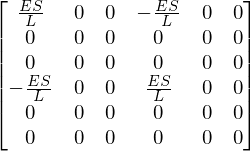

In [38]:
ES = sp.Symbol('ES')
Ke_ext = ES*sp.integrate(B[0,:].transpose()*B[0,:],(s,0,L))
Ke_ext 

Similarly for the bending energy
$$
\mathcal E_{\mathrm{bend}} = \int_0^L\dfrac{EI}{2} v''(s)^2 = \dfrac{1}{2}K^e_{\mathrm{ben}} U\cdot U
$$
where

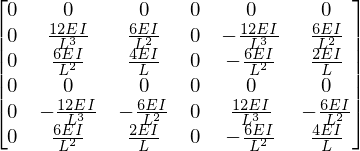

In [39]:
EI = sp.Symbol('EI')
Ke_bend = EI*sp.integrate(B[1,:].transpose()*B[1,:],(s,0,L))
Ke_bend

Hence the total elastic energy of the beam is given by
$$
\mathcal E   = \dfrac{1}{2}K_e U\cdot U
$$
where $K_e$ is called *stiffness matrix*

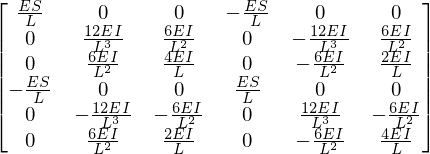

In [40]:
Ke = Ke_ext + Ke_bend
Ke

### External force vector
Using the polynomial approximation for the displacement, the work of the external forces gives
$$
\mathcal{F} = \int_0^L f_u(s) \,u(s)+f_v(s) \,v(s)\,ds = F^{(e)}\cdot U
$$
where 
$$
F^{(e)}_i = \int_0^L f_u(s) \,S_{0i}(s)+f_v(s) \,S_{1i}(s)\,ds 
$$
$S$ Being the matrix of shape function define above. 

For example, for the case of a beam of mass density per unit line $\rho S$  submitted to its own weight

In [41]:
p = sp.Symbol("p")
f_u = 0
f_v = - p

where $p=\rho S\,g$ and 

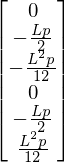

In [42]:
Fe = sp.Matrix([sp.integrate(f_u *S[0,i]+f_v*S[1,i],(s,0,L)) for i in range(6)])
Fe

### Numerical `numpy` array version
For the following developments, it is convenient to work with numerical quantities. We start using the  `python` package for *numerical linear algebra*, `numpy`

In [43]:
import numpy as np
Ken = np.array(Ke.subs({EI:1., ES:100., L:1.}))
Fen = np.array(Fe.subs({L:1., p:1.}))
Ken,Fen

(array([[100.000000000000, 0, 0, -100.000000000000, 0, 0],
        [0, 12.0000000000000, 6.00000000000000, 0, -12.0000000000000,
         6.00000000000000],
        [0, 6.00000000000000, 4.00000000000000, 0, -6.00000000000000,
         2.00000000000000],
        [-100.000000000000, 0, 0, 100.000000000000, 0, 0],
        [0, -12.0000000000000, -6.00000000000000, 0, 12.0000000000000,
         -6.00000000000000],
        [0, 6.00000000000000, 2.00000000000000, 0, -6.00000000000000,
         4.00000000000000]], dtype=object), array([[0],
        [-0.500000000000000],
        [-0.0833333333333333],
        [0],
        [-0.500000000000000],
        [0.0833333333333333]], dtype=object))

Or, if we want to print it out nicely

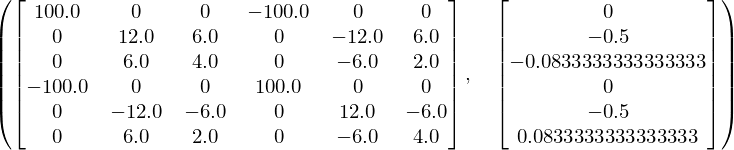

In [44]:
sp.Matrix(Ken),sp.Matrix(Fen)

# Assembling several beam elements

## Elements and nodes

Consider now a beam and let us partition it in $n_{e}$ segments, that we will call **elements**, separated by $n$ **nodes** with coordinates $\{(x_I,y_I)\}_{I=1}^{n}$. 

We can define nodes as points

In [21]:
n_elements = 4
xnodes = np.linspace(0,1,n_elements + 1)
ynodes = np.linspace(0,0,n_elements + 1)
nodes = np.array([xnodes,ynodes]).transpose()
n_nodes = xnodes.size
nodes

array([[ 0.  ,  0.  ],
       [ 0.25,  0.  ],
       [ 0.5 ,  0.  ],
       [ 0.75,  0.  ],
       [ 1.  ,  0.  ]])

And elements as lists of nodes

In [22]:
elements = np.array([[i,i+1] for i in range(n_elements)])
elements

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4]])

We show below how to plot the elements and the nodes in `python` using `matplotlib` (http://matplotlib.org) 

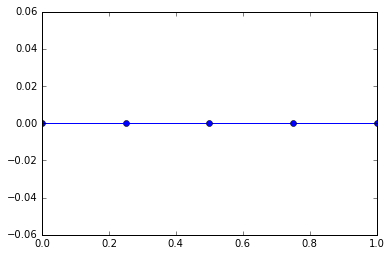

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(xnodes,ynodes,'o-')

Or you can have fun and make it prettier

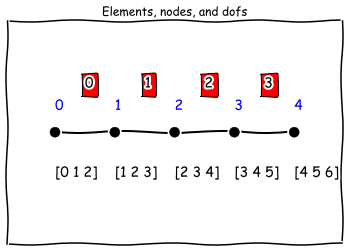

In [24]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.plot(xnodes,ynodes,'o-',lw=2, color='black', ms=10)
    for i in range(n_nodes):
        ax.text(xnodes[i], -.02, np.array([i,i+1,i+2]))
        ax.text(xnodes[i], .01, i, color = 'b')
    for e in range(n_elements):
        ax.text(xnodes[e]+(xnodes[e+1]-xnodes[e])/2., .02, str(e), bbox=dict(facecolor='red'))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Elements, nodes, and dofs")
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.05, 0.05)



## Local and global degrees of freedoms (dofs)
Let us discretise each beam segment with the same polynomial function as above. 
We collect the displacements and rotations of all the nodes in the vector of the *global degrees of freedom*
$$
U=
\begin{bmatrix}
u_1&v_1&q_1&u_2&v_2&q_2,\ldots,u_n&v_n&q_n
\end{bmatrix}^T
$$


For a generic element we can express the displacement in each element as the displacement and rotation of its end nodes
$$
 U^{(e)}=
\begin{bmatrix}
\tilde u_0&\tilde v_0& \tilde q_0& \tilde u_1& \tilde v_1& \tilde q_1
\end{bmatrix}^T
$$
which are the *local degrees of freedom*. We look how to define the correspondence between the components of the two vectors.

## Dof map

We call *dofmap* the function associating an element number $e$ and the local index of a component of $U^{(e)}$, say  $i_\textrm{local}$, the  global index of the corresponding component of $U$, say $i$:
$$
i = \textrm{dofmap}(e,i_\textrm{local})
$$
such that 
$$
U_i = U^{(e)}_{i_\textrm{local}}
$$
For the case of the beam above, one can easily check that
$
i = 3*e + i_\textrm{local}
$

In [25]:
def dof_map(e, i_local):
    return 3*(e)+i_local

For example, the global indices of the dof of the element $e=2$ are (`python` indices start from $0$)

In [26]:
def dof_map_e(e):
    return [dof_map(e, i_local) for  i_local in range(6)]
dof_map_e(2)

## Elastic energy, local and global stiffness matrices

We can write the elastic energy of the beam in the following form

$$
\mathcal E = \sum_{el=1}\int_{el}\dfrac{ES}{2}e^2+\dfrac{EI}{2}k^2ds=\sum_{el=1}\dfrac{1}{2}K_{e} U^{(e)}\cdot U^{(e)}
$$

where $K^{e}$ is the **local stifness matrix** of the element $e$

We define the **global stiffness matrix** $K$ the matrix such that
$$
\mathcal E = \sum_{el=1}\dfrac{1}{2}K^{(e)} U^{(e)}\cdot U^{(e)} = \dfrac{1}{2}K U\cdot U
$$

Here $K^{(e)}$ is $6\times 6$, whilst $K$ is $3 n\times 3 n$.

The global stiffness is obained as follows

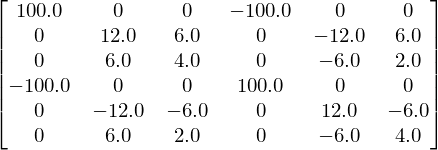

In [27]:
sp.Matrix(Ken)

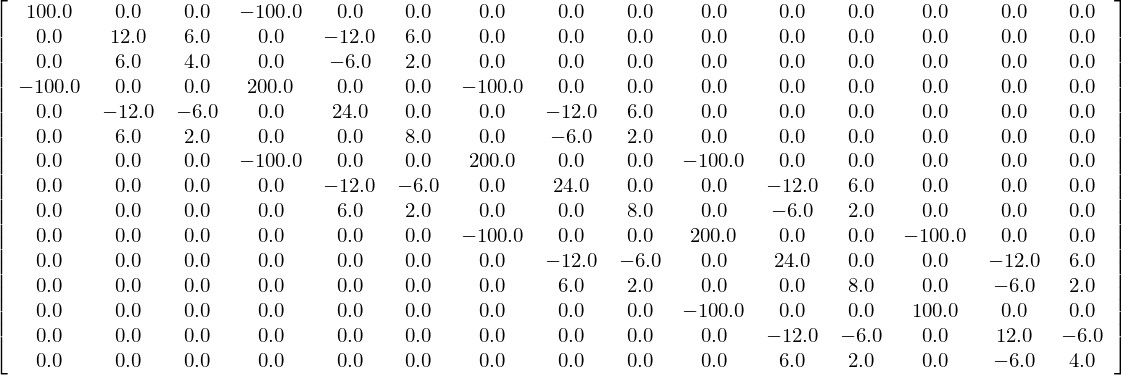

In [28]:
K = np.zeros([3*n_nodes,3*n_nodes])
for e in range(n_elements):
    for i_local in range(6):
        for j_local in range(6):
            K[dof_map(e, i_local),dof_map(e, j_local)] += Ken[i_local,j_local]     
sp.Matrix(K)

We can also represent it graphically

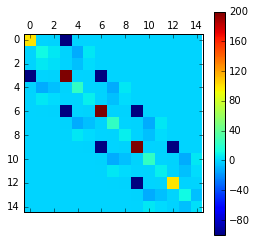

In [29]:
plt.matshow(K, interpolation='none')
plt.colorbar()

## Work of external forces and global force vector

As for the elastic energy, we can calculate the work of external forces using a global force vector. 
$$
\mathcal{F} = \int_0^L f_u(s) \,u(s)+f_v(s) \,v(s)\,ds = \sum_e F^{(e)}\cdot U^{(e)}= F\cdot U
$$
where the global vector is found by assembling the local ones. 

For the case of the beam submitted to its own weight

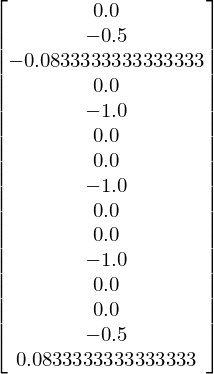

In [30]:
F = np.zeros([3*n_nodes])
for e in range(n_elements):
    for i_local in range(6):    
        F[dof_map(e, i_local)] += Fen[i_local] 
sp.Matrix(F)

# Solve the system

We have finally a linear system to solve of the type
$$
K\,U = F
$$
However some of the components of $U$ are prescribed by the boundary conditions. This should be accounted for.


## Boundary conditions 

In our case of a clamped 4-element beam, the first three and the last three components of $U$ are blocked.

In [31]:
blocked_dof = np.array([0, 1, 2, F.size-3, F.size-2, F.size-1])
blocked_dof

array([ 0,  1,  2, 12, 13, 14])

Their values are all imposeed to zero. We collect these values in a vector

In [32]:
bc_values = np.array([0, 0, 0, 0, 0, 0])
bc_values

array([0, 0, 0, 0, 0, 0])

It is useful also to define the following vector, saying if a giving dof is blocked or not

In [33]:
bc_flags = 0*F.astype("bool")
bc_flags[blocked_dof] = 1
bc_flags

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

## Imposing boundary conditions and solve

A first method to imposed bc's is to hack the linear system, so as it verifies the given conditions.
The following method is classically employed to keep the system symmetric. We will comment in class.

In [34]:
def bc_apply(K,F,blocked_dof,bc_values):
    for (i, dof) in enumerate(blocked_dof): 
        Kbc = K 
        Fbc = F
        Kbc[dof, :] = 0
        Kbc[:, dof] = 0
        Kbc[dof, dof] = 1
        Fbc +=  - K[:,dof]*bc_values[i]
        Fbc[dof] = bc_values[i]
    return Kbc, Fbc

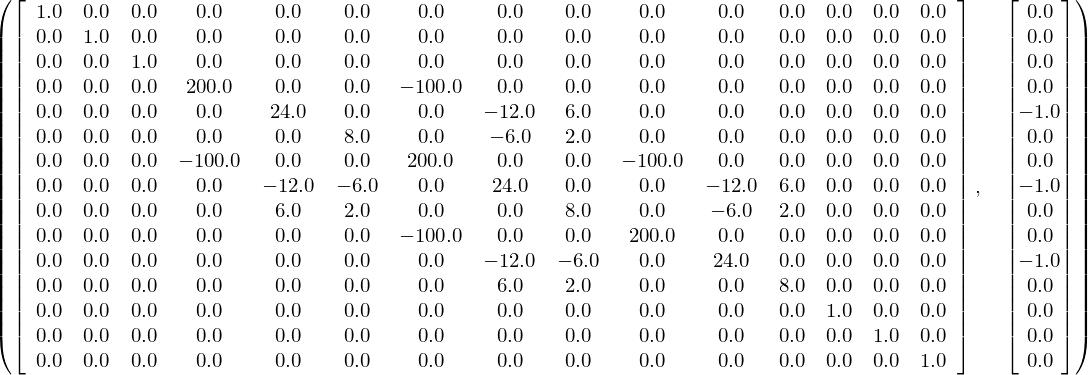

In [35]:
Kbc, Fbc = bc_apply(K, F, blocked_dof, bc_values)
sp.Matrix(Kbc), sp.Matrix(Fbc)

To solve the linear systems we use the tools available in `numpy` (we could also program our LU or CG solver ...)

In [36]:
# from scipy.sparse import linalg
Usol = np.linalg.solve(Kbc,Fbc)
Usol

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -3.75000000e-01,  -5.00000000e-01,
         0.00000000e+00,  -6.66666667e-01,   4.93432455e-17,
         0.00000000e+00,  -3.75000000e-01,   5.00000000e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

This is a simple visualization of the solution

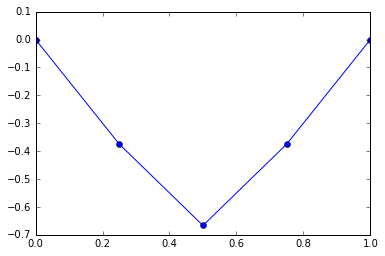

In [37]:
def plot_deformed(Usol):
    x_c = nodes[:,0]+[Usol[3*e] for e in range(n_nodes)]
    y_c = nodes[:,1]+[Usol[3*e+1] for e in range(n_nodes)]
    return plt.plot(x_c, y_c, '-o')
plot_deformed(Usol)

## Imposing boundary conditions (alternative method) and solve

To impose the bcs, we solve a reduced system, where we eliminate the rows and columns corresponding to blocked dof. We call `K_red` and `F_red` the new matrix

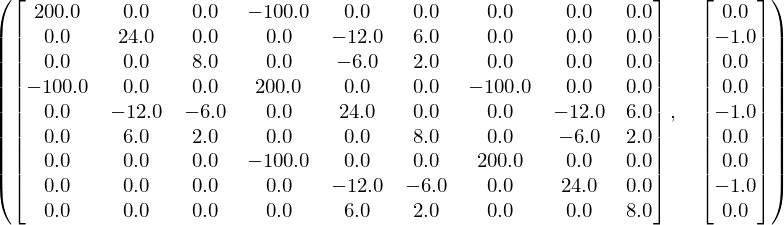

In [38]:
K_red = np.delete(K, blocked_dof, axis = (0))
K_red = np.delete(K_red, blocked_dof, axis = (1))
F_red = np.delete(F, blocked_dof, axis = (0))
sp.Matrix(K_red),sp.Matrix(F_red)

We solve the reduced linear system using the tools available in `numpy` (more on the next classes)

In [39]:
from scipy.sparse import linalg
Usol_red = np.linalg.solve(K_red,F_red)
Usol_red

array([  0.00000000e+00,  -3.75000000e-01,  -5.00000000e-01,
         0.00000000e+00,  -6.66666667e-01,   4.93432455e-17,
         0.00000000e+00,  -3.75000000e-01,   5.00000000e-01])

Of course we miss the points with blocked dofs... But we can easily reintegrate the missing points into the vector

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -3.75000000e-01  -5.00000000e-01   0.00000000e+00  -6.66666667e-01
   4.93432455e-17   0.00000000e+00  -3.75000000e-01   5.00000000e-01
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


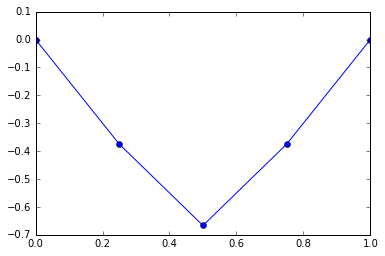

In [40]:
Usol_full = np.zeros(F.size)
Usol_full[bc_flags==0]=Usol_red
print Usol_full
plot_deformed(Usol_full)